<a href="https://colab.research.google.com/github/minassy/ISID_2021/blob/main/210908_EDA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import glob
import pandas as pd
import numpy as np
import pathlib
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#作業基本ディレクトリ
DIR = 'drive/MyDrive/00_Competition/ISID/2021'
os.listdir(DIR)
#os.mkdir(DIR+'/data')

['data',
 '210904_学習データの読み込み.ipynb',
 '210906_EDA_train.ipynb',
 '210908_テストデータの読み込み～作成.ipynb',
 '210908_EDA_test.ipynb']

In [4]:
os.listdir(os.path.join(DIR, 'data', 'Test_Unit_20210903'))

['Test_Unit_1', 'Test_Unit_2', 'Test_Unit_3', 'dataset_test_all.csv']

In [5]:
#データの読み込み
df_0 = pd.read_csv(
    os.path.join(DIR, 'data', 'Test_Unit_20210903', 'dataset_test_all.csv'),
    encoding='utf-8')

In [6]:
#不必要なIndex列と空白列を削除。
df_0 = df_0.drop(df_0.columns[[0, 7]], axis=1)

In [7]:
#データ処理用にDFをコピー
df = df_0.copy()

In [8]:
df.head()

,Time (s),Voltage Measured (V),Voltage Charge (V),Current Measured (Amps),Current Charge (Amps),Temperature (degree C),unit,charge_mode,Cycle_num,Voltage Load (V),Current Load (Amps)
0,0.000,3.4268,-0.007,0.000887,0.000,33.569,Test_Unit_1,Charge,61,NaN,NaN
1,2.484,3.1242,1.439,-3.518300,-3.536,33.511,Test_Unit_1,Charge,61,NaN,NaN
2,7.297,3.5065,4.219,1.516100,1.507,33.502,Test_Unit_1,Charge,61,NaN,NaN
3,11.891,3.5454,4.273,1.517200,1.507,33.491,Test_Unit_1,Charge,61,NaN,NaN
4,16.484,3.5689,4.295,1.517200,1.507,33.453,Test_Unit_1,Charge,61,NaN,NaN


In [9]:
df.columns

Index(['Time (s)', 'Voltage Measured (V)', 'Voltage Charge (V)',
       'Current Measured (Amps)', 'Current Charge (Amps)',
       'Temperature (degree C)', 'unit', 'charge_mode', 'Cycle_num',
       'Voltage Load (V)', 'Current Load (Amps)'],
      dtype='object')

In [10]:
#カラム名変更前後の辞書
col_list = {'Time (s)' : 'Time',
            'Voltage Measured (V)' : 'VM',
            'Voltage Charge (V)' : 'VC',
            'Current Measured (Amps)' : 'CM', 
            'Current Charge (Amps)' : 'CC',
            'Temperature (degree C)': 'Temp', 
            'unit' : 'unit_name', 
            'charge_mode' : 'mode', 
            'Cycle_num' : 'Cycle',
            'Voltage Load (V)' : 'VL',
            'Current Load (Amps)' : 'CL'
}

In [11]:
df = df.rename(columns=col_list)
df.head()

,Time,VM,VC,CM,CC,Temp,unit_name,mode,Cycle,VL,CL
0,0.000,3.4268,-0.007,0.000887,0.000,33.569,Test_Unit_1,Charge,61,NaN,NaN
1,2.484,3.1242,1.439,-3.518300,-3.536,33.511,Test_Unit_1,Charge,61,NaN,NaN
2,7.297,3.5065,4.219,1.516100,1.507,33.502,Test_Unit_1,Charge,61,NaN,NaN
3,11.891,3.5454,4.273,1.517200,1.507,33.491,Test_Unit_1,Charge,61,NaN,NaN
4,16.484,3.5689,4.295,1.517200,1.507,33.453,Test_Unit_1,Charge,61,NaN,NaN


In [12]:
DIR_DATA_TEST = os.path.join(DIR, 'data', 'Test_Unit_20210903')
for folder in os.listdir(DIR_DATA_TEST)[:3]:
  for C in os.listdir(os.path.join(DIR_DATA_TEST, folder)):
    files = glob.glob(os.path.join(DIR_DATA_TEST, folder, C, '*.csv'))
    print(f'{folder}','--',f'{C}のサイクル数：',len(files))

Test_Unit_1 -- Chargeのサイクル数： 70
Test_Unit_1 -- Dischargeのサイクル数： 70
Test_Unit_2 -- Chargeのサイクル数： 12
Test_Unit_2 -- Dischargeのサイクル数： 12
Test_Unit_3 -- Chargeのサイクル数： 55
Test_Unit_3 -- Dischargeのサイクル数： 55


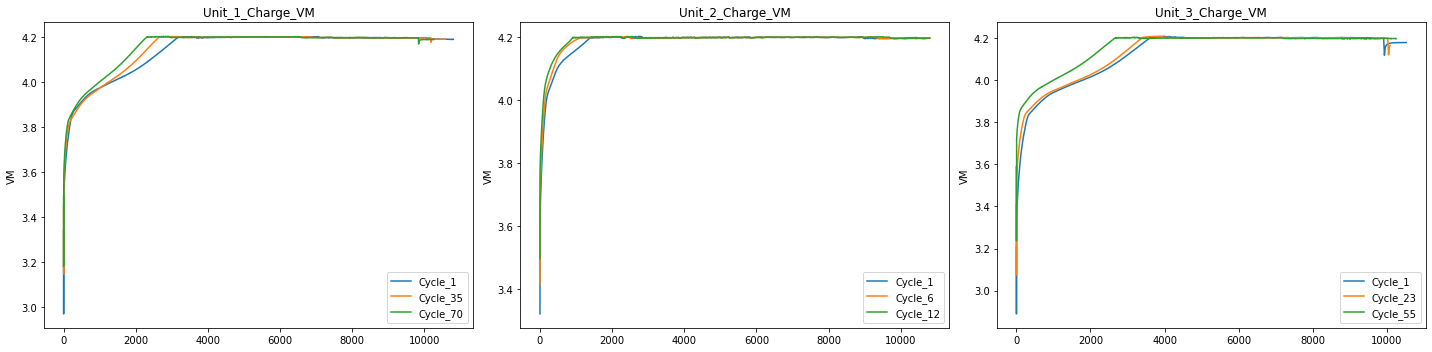

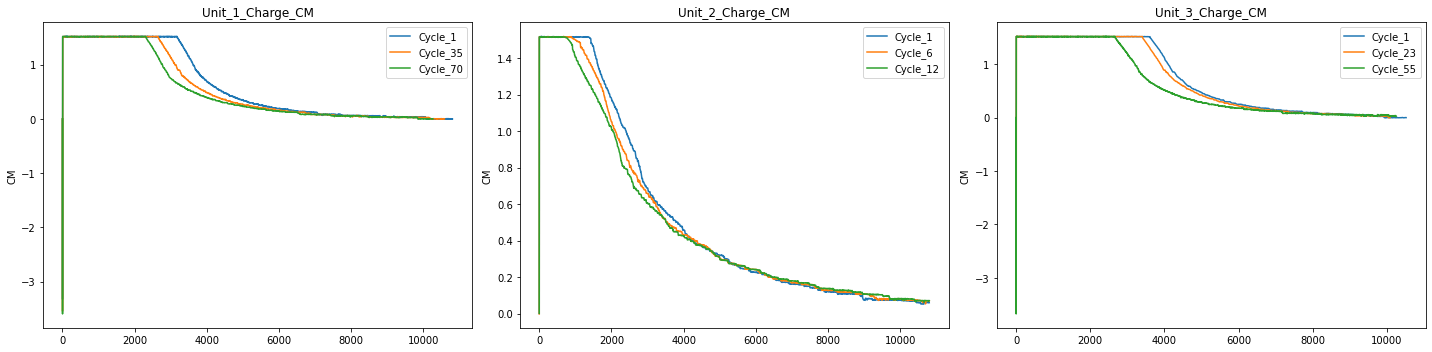

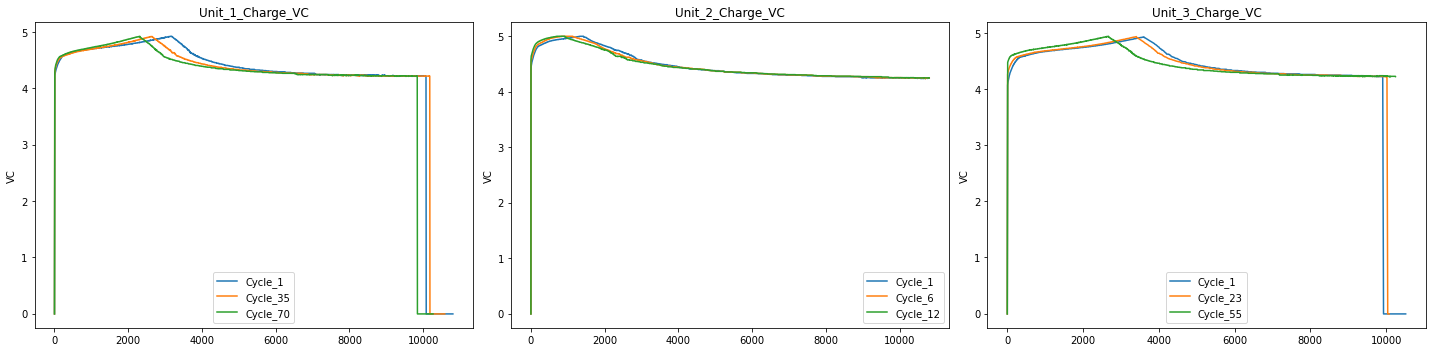

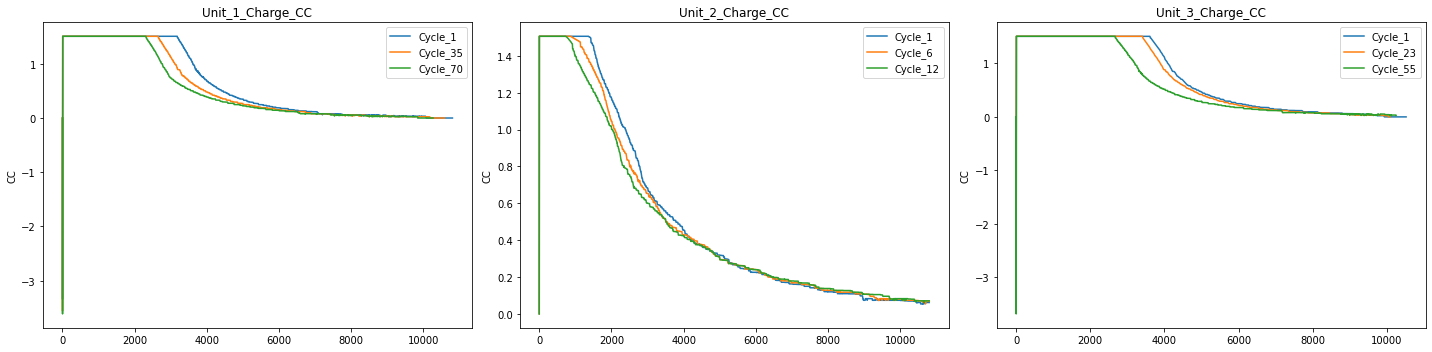

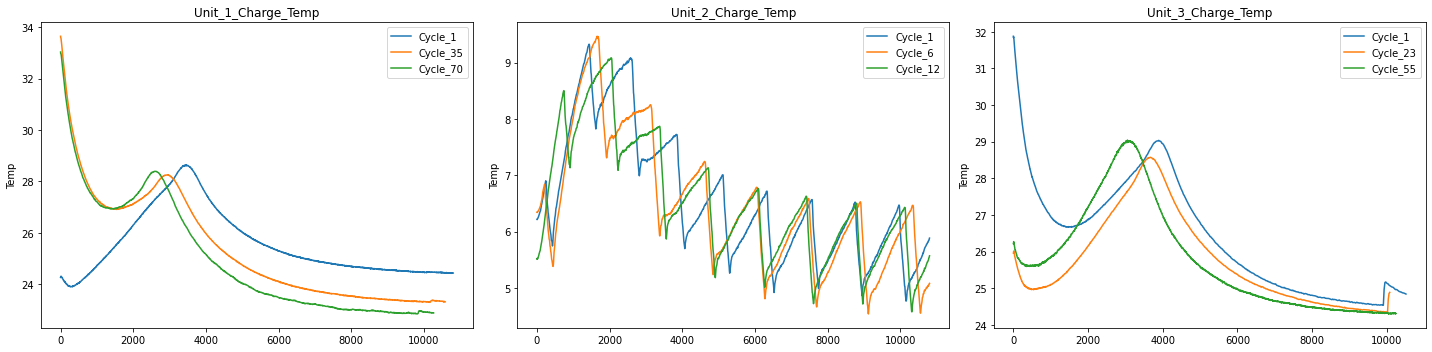

In [14]:
#充電
mode =  'Charge'
#mode =  'Discharge'

cols = ['VM', 'CM', 'VC', 'CC', 'Temp']
#cols = ['VM', 'CM', 'VL', 'CL', 'Temp']

for col in cols:
  fig = plt.figure(figsize=(20,5))

  ax1 = fig.add_subplot(1, 3, 1)#unit1
  ax2 = fig.add_subplot(1, 3, 2)#unit2
  ax3 = fig.add_subplot(1, 3, 3)#unit3

  #ユニット1
  unit = 'Test_Unit_1'

  ax1_cycle_first = 1
  ax1_cycle_mid = 35
  ax1_cycle_final = 70

  ax1_first = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_first) & (df['unit_name'] == unit)]
  ax1_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_mid) & (df['unit_name'] == unit)]
  ax1_final = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_final) & (df['unit_name'] == unit)]

  ax1.plot(ax1_first['Time'], ax1_first[col], label=f'Cycle_{ax1_cycle_first}')
  ax1.plot(ax1_mid['Time'], ax1_mid[col], label=f'Cycle_{ax1_cycle_mid}')
  ax1.plot(ax1_final['Time'], ax1_final[col], label=f'Cycle_{ax1_cycle_final}')
  ax1.set_title(f'Unit_1_{mode}_{col}')
  ax1.set_ylabel(col)
  ax1.legend()

  #ユニット2
  unit = 'Test_Unit_2'

  ax2_cycle_first = 1
  ax2_cycle_mid = 6
  ax2_cycle_final = 12

  ax2_first = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_first) & (df['unit_name'] == unit)]
  ax2_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_mid) & (df['unit_name'] == unit)]
  ax2_final = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_final) & (df['unit_name'] == unit)]

  ax2.plot(ax2_first['Time'], ax2_first[col], label=f'Cycle_{ax2_cycle_first}')
  ax2.plot(ax2_mid['Time'], ax2_mid[col], label=f'Cycle_{ax2_cycle_mid}')
  ax2.plot(ax2_final['Time'], ax2_final[col], label=f'Cycle_{ax2_cycle_final}')
  ax2.set_title(f'Unit_2_{mode}_{col}')
  ax2.set_ylabel(col)
  ax2.legend()

  #ユニット3
  unit = 'Test_Unit_3'

  ax3_cycle_first = 1
  ax3_cycle_mid = 23
  ax3_cycle_final = 55

  ax3_first = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_first) & (df['unit_name'] == unit)]
  ax3_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_mid) & (df['unit_name'] == unit)]
  ax3_final = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_final) & (df['unit_name'] == unit)]

  ax3.plot(ax3_first['Time'], ax3_first[col], label=f'Cycle_{ax3_cycle_first}')
  ax3.plot(ax3_mid['Time'], ax3_mid[col], label=f'Cycle_{ax3_cycle_mid}')
  ax3.plot(ax3_final['Time'], ax3_final[col], label=f'Cycle_{ax3_cycle_final}')
  ax3.set_title(f'Unit_3_{mode}_{col}')
  ax3.set_ylabel(col)
  ax3.legend()

  fig.tight_layout()
  plt.show()

・trainとtestのデータを見比べて、使用する特徴量を選択する。

【特徴量の選択】充電  
VM：〇  
CM：〇  
VC：〇  
CC：×(CMと挙動が全く同じなので。線形制約が入るので不要列と判断。)  
Temp：×(ユニット2に関して、かなり乱れがある。恐らく、これが予測時の大きなノイズになりそうなので除去しておく。)  

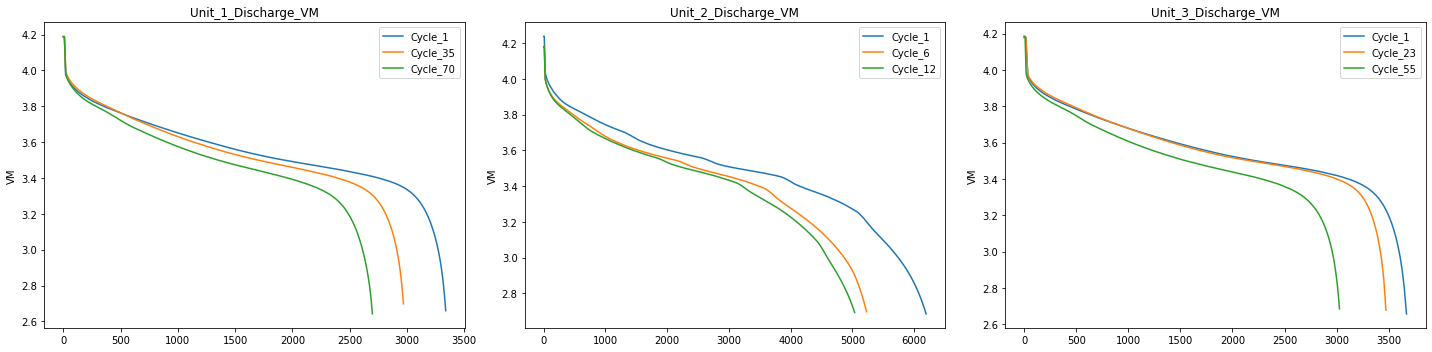

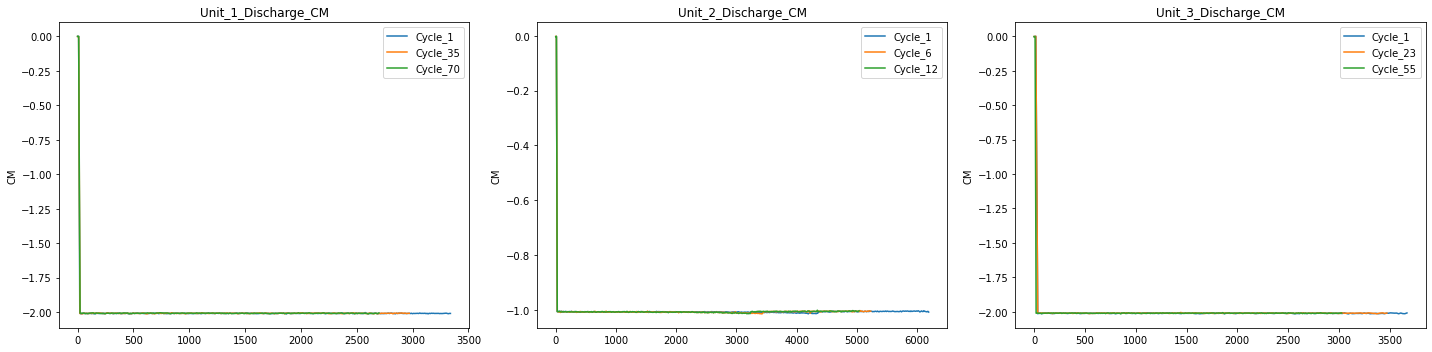

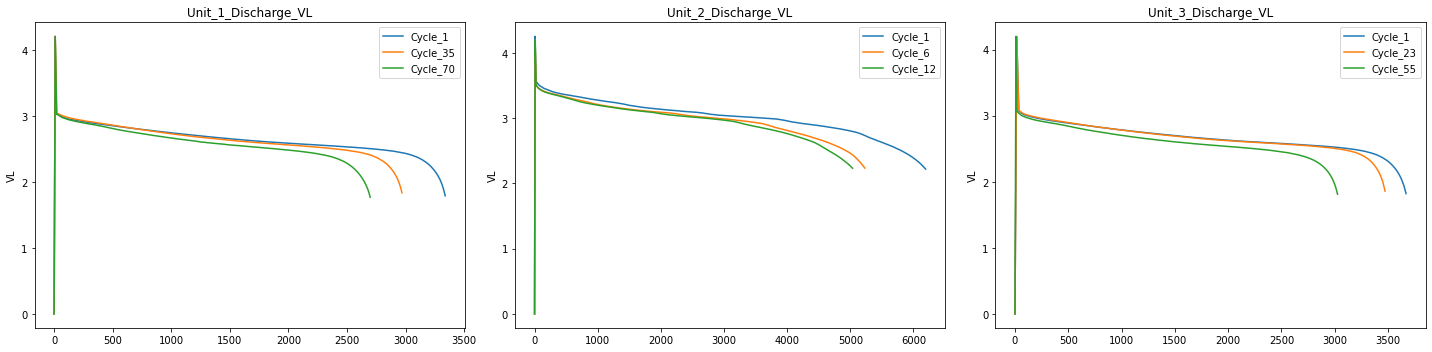

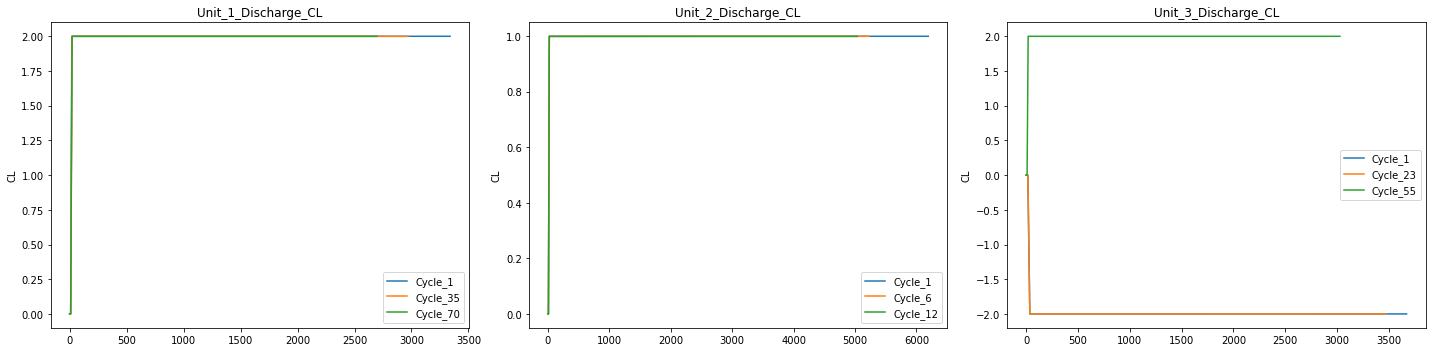

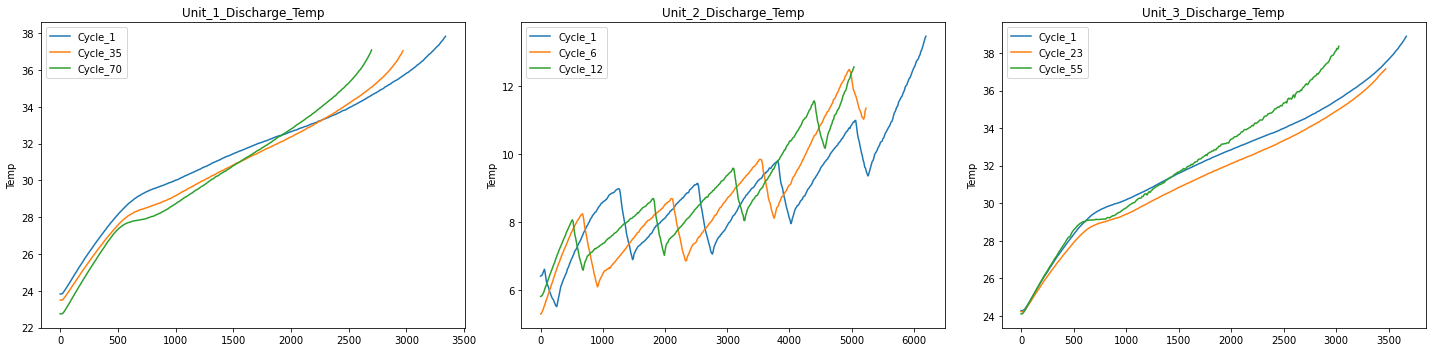

In [15]:
#放電
#mode =  'Charge'
mode =  'Discharge'

#cols = ['VM', 'CM', 'VC', 'CC', 'Temp']
cols = ['VM', 'CM', 'VL', 'CL', 'Temp']

for col in cols:
  fig = plt.figure(figsize=(20,5))

  ax1 = fig.add_subplot(1, 3, 1)#unit1
  ax2 = fig.add_subplot(1, 3, 2)#unit2
  ax3 = fig.add_subplot(1, 3, 3)#unit3

  #ユニット1
  unit = 'Test_Unit_1'

  ax1_cycle_first = 1
  ax1_cycle_mid = 35
  ax1_cycle_final = 70

  ax1_first = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_first) & (df['unit_name'] == unit)]
  ax1_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_mid) & (df['unit_name'] == unit)]
  ax1_final = df[(df['mode'] == mode) & (df['Cycle'] == ax1_cycle_final) & (df['unit_name'] == unit)]

  ax1.plot(ax1_first['Time'], ax1_first[col], label=f'Cycle_{ax1_cycle_first}')
  ax1.plot(ax1_mid['Time'], ax1_mid[col], label=f'Cycle_{ax1_cycle_mid}')
  ax1.plot(ax1_final['Time'], ax1_final[col], label=f'Cycle_{ax1_cycle_final}')
  ax1.set_title(f'Unit_1_{mode}_{col}')
  ax1.set_ylabel(col)
  ax1.legend()

  #ユニット2
  unit = 'Test_Unit_2'

  ax2_cycle_first = 1
  ax2_cycle_mid = 6
  ax2_cycle_final = 12

  ax2_first = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_first) & (df['unit_name'] == unit)]
  ax2_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_mid) & (df['unit_name'] == unit)]
  ax2_final = df[(df['mode'] == mode) & (df['Cycle'] == ax2_cycle_final) & (df['unit_name'] == unit)]

  ax2.plot(ax2_first['Time'], ax2_first[col], label=f'Cycle_{ax2_cycle_first}')
  ax2.plot(ax2_mid['Time'], ax2_mid[col], label=f'Cycle_{ax2_cycle_mid}')
  ax2.plot(ax2_final['Time'], ax2_final[col], label=f'Cycle_{ax2_cycle_final}')
  ax2.set_title(f'Unit_2_{mode}_{col}')
  ax2.set_ylabel(col)
  ax2.legend()

  #ユニット3
  unit = 'Test_Unit_3'

  ax3_cycle_first = 1
  ax3_cycle_mid = 23
  ax3_cycle_final = 55

  ax3_first = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_first) & (df['unit_name'] == unit)]
  ax3_mid = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_mid) & (df['unit_name'] == unit)]
  ax3_final = df[(df['mode'] == mode) & (df['Cycle'] == ax3_cycle_final) & (df['unit_name'] == unit)]

  ax3.plot(ax3_first['Time'], ax3_first[col], label=f'Cycle_{ax3_cycle_first}')
  ax3.plot(ax3_mid['Time'], ax3_mid[col], label=f'Cycle_{ax3_cycle_mid}')
  ax3.plot(ax3_final['Time'], ax3_final[col], label=f'Cycle_{ax3_cycle_final}')
  ax3.set_title(f'Unit_3_{mode}_{col}')
  ax3.set_ylabel(col)
  ax3.legend()

  fig.tight_layout()
  plt.show()

【特徴量の選択】放電  
VM：〇  
CM：×(サイクルを経ても全く差がでない。なので、予測には寄与しない列と判断し削除)  
VL：〇  
CL：×(サイクルを経ても全く差がでない。なので、予測には寄与しない列と判断し削除)    
Temp：×(ユニット2に関して、かなり乱れがある。恐らく、これが予測時の大きなノイズになりそうなので除去しておく。)  

【使用特徴量のまとめ】  
充電  
VM：〇  
CM：〇  
VC：〇  

放電  
VM：〇  
VL：〇  
⇒5つの特徴に絞られた。